GitHub compatibility issues with folium's JS: 
https://nbviewer.jupyter.org/github/OckerGui/DataScience/blob/master/Covid_SC_Brazil.ipynb

Sources: 
* https://servicodados.ibge.gov.br/api/docs/malhas?versao=2
* https://servicodados.ibge.gov.br/api/v2/malhas/42?resolucao=5&formato=application/vnd.geo+json
* https://medium.com/@datalivre/folium-d6036a9ad29c

In [3]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from pandas.io.json import json_normalize
from branca.colormap import linear

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
api = pd.read_json('https://brasil.io/api/dataset/covid19/caso/data?search=&date=&state=SC&city=&place_type=city&is_last=True&city_ibge_code=&order_for_place=')
df = pd.json_normalize(api['results'])
df.rename(columns={'city_ibge_code':'codarea'}, inplace=True)
newgeo = requests.get('https://servicodados.ibge.gov.br/api/v2/malhas/42?resolucao=5&formato=application/vnd.geo+json').json()

In [69]:
df.head()

,city,city_ibge_code,confirmed,confirmed_per_100k_inhabitants,date,death_rate,deaths,estimated_population_2019,is_last,order_for_place,place_type,state
0,Abdon Batista,4200051,1,39.01678,2020-06-02,0.0,0,2563.0,True,5,city,SC
1,Abelardo Luz,4200101,5,27.92672,2020-06-02,0.0,0,17904.0,True,23,city,SC
2,Agrolândia,4200200,9,82.84242,2020-06-02,0.0,0,10864.0,True,8,city,SC
3,Agronômica,4200309,10,183.55360,2020-06-02,0.1,1,5448.0,True,16,city,SC
4,Água Doce,4200408,6,83.97481,2020-06-02,0.0,0,7145.0,True,31,city,SC


In [279]:
df.loc[df['city'] == 'Lages']

,city,codarea,confirmed,confirmed_per_100k_inhabitants,date,death_rate,deaths,estimated_population_2019,is_last,order_for_place,place_type,state
107,Lages,4209300,70,44.43203,2020-06-02,0.0,0,157544.0,True,73,city,SC


In [5]:
map_param = 'confirmed' #'deaths'

colormap = linear.YlOrRd_09.scale(0,931)
dfmap = df.set_index('codarea')[map_param]
colormap

In [0]:
newgeo['features'][0]['properties']['city'] = 'Cidade Teste'

In [0]:
for acity in newgeo['features']:
  acity['properties']['city'] = getNameByCodArea(acity['properties']['codarea'])

Tiles styles
* ”OpenStreetMap”
* ”Stamen Terrain”, “Stamen Toner”, “Stamen Watercolor”
* ”CartoDB positron”, “CartoDB dark_matter”
* ”Mapbox Bright”, “Mapbox Control Room” (Limited zoom)
* ”Cloudmade” (Must pass API key)
* ”Mapbox” (Must pass API key)

Need to add hover tooltip

In [268]:
bla = df.loc[df['codarea'] == '4200309']
bla['city'].values[0] + ' - Casos: ' + str(bla['confirmed'].values[0]) + ' - Mortes: ' + str(bla['deaths'].values[0])

'Agronômica - Casos: 10 - Mortes: 1'

In [269]:
bla = df.loc[df['codarea'] == '4200309']
'{} - Casos: {} - Mortes: {}'.format(bla['city'].values[0] ,bla['confirmed'].values[0], bla['deaths'].values[0])

'Agronômica - Casos: 10 - Mortes: 1'

In [212]:
if '4218400' in df['codarea'].values:
  print(df.loc[df['codarea'] == '4218400'])
else:
  print('')

              city  codarea  confirmed  ...  order_for_place place_type  state
211  Treze de Maio  4218400          4  ...               51       city     SC

[1 rows x 12 columns]


In [0]:
def getNameByCodArea(codarea):
    if codarea in df['codarea'].values:
      city = df.loc[df['codarea'] == codarea]
      return '{} - Casos: {} - Mortes: {}'.format(city['city'].values[0] ,city['confirmed'].values[0], city['deaths'].values[0])
    else:
      return 'Sem dados'

In [272]:
getNameByCodArea('4218400')

'Treze de Maio - Casos: 4 - Mortes: 0'

In [11]:
mapa = folium.Map(
    width=900, height=750,
    location=[-27.4892531,-50.9200097], 
    zoom_start=7.4,
    tiles='OpenStreetMap'
)
folium.GeoJson(
    newgeo,
    name='Mortes por COVID-19 - Santa Catarina',
    tooltip=folium.GeoJsonTooltip(fields= ['city'], labels=False),
    style_function=lambda feature: {
        'fillColor': colormap(dfmap[feature['properties']['codarea']] if feature['properties']['codarea'] in dfmap.index else dfmap['4200051']),
        'color': 'black',
        'weight': 0.3,
    }).add_to(mapa)
colormap.caption = 'Mortes por COVID-19 - Santa Catarina'
colormap.add_to(mapa)

#folium.LayerControl(collapsed=False).add_to(mapa)
mapa

In [0]:
distcity = df.groupby('city').sum().sort_values(by='confirmed', ascending=False)[:30][['confirmed','deaths']]
#distcityg = df.groupby(['city','confirmed', 'deaths']).sum()

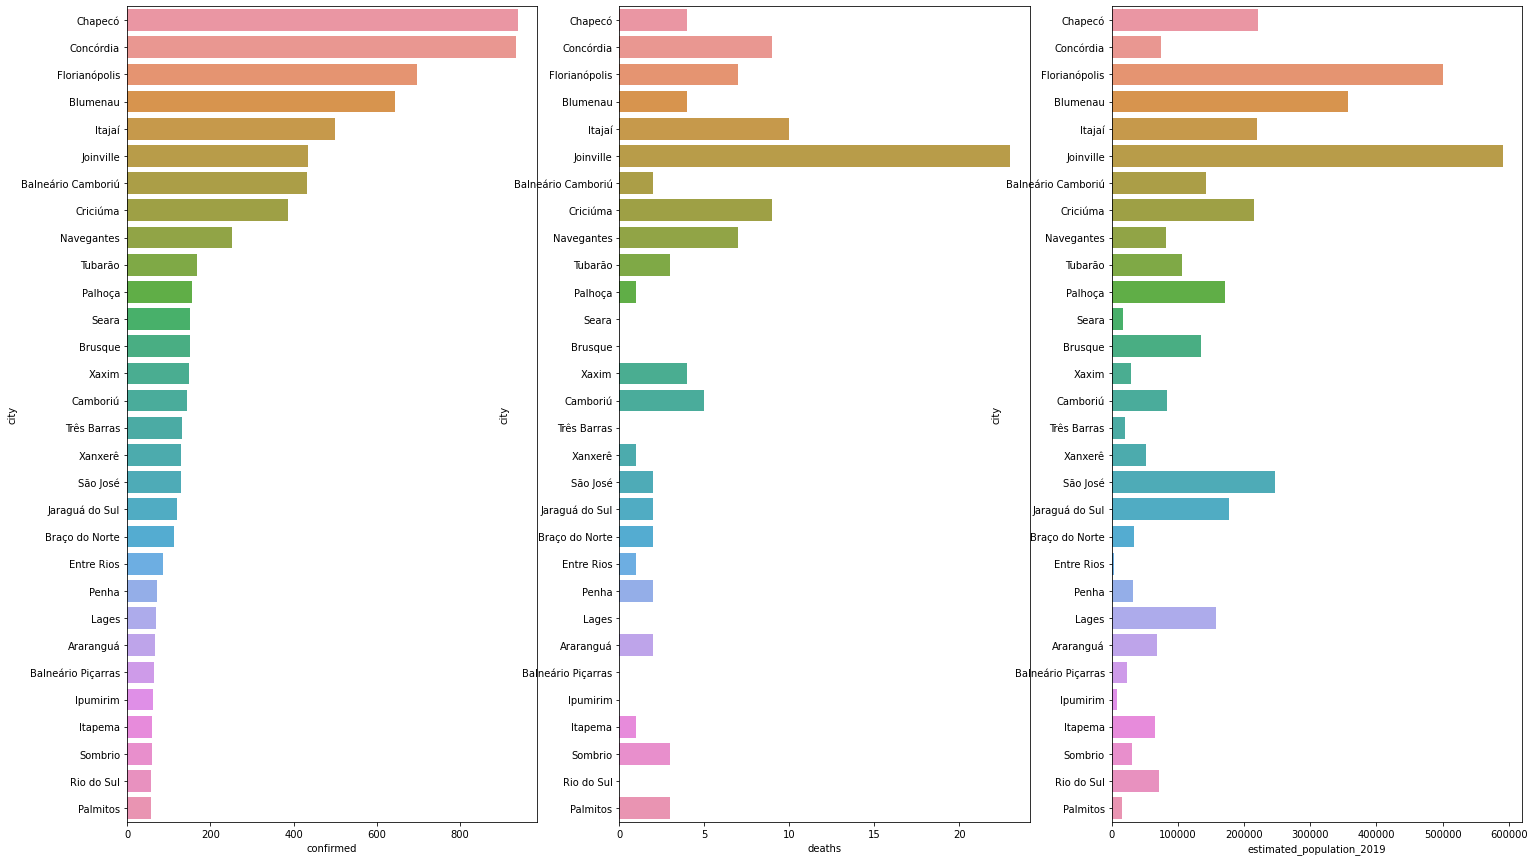

In [8]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(25,15)
sns.barplot(y='city', x='confirmed', data=df.sort_values(by='confirmed', ascending=False)[:30], ax=ax[0])
sns.barplot(y='city', x='deaths', data=df.sort_values(by='confirmed', ascending=False)[:30], ax=ax[1])
sns.barplot(y='city', x='estimated_population_2019', data=df.sort_values(by='confirmed', ascending=False)[:30], ax=ax[2])

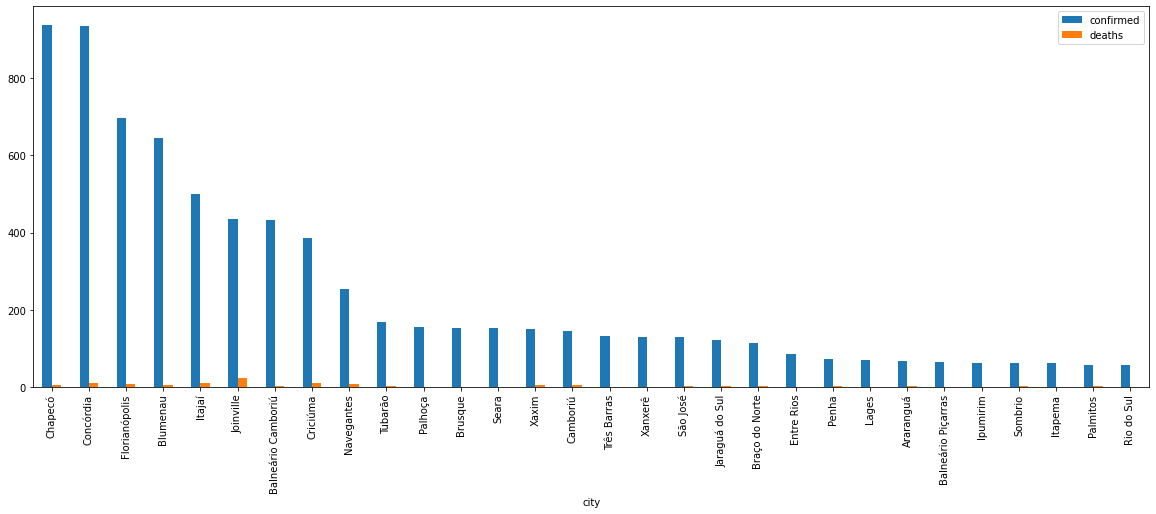

In [89]:

distcity.sort_values(by='confirmed', ascending=False)[:30][['confirmed','deaths']].plot(kind = 'bar',figsize=(20,7))

In [0]:
df.head()

,city,codarea,confirmed,confirmed_per_100k_inhabitants,date,death_rate,deaths,estimated_population_2019,is_last,order_for_place,place_type,state
0,Abdon Batista,4200051,1,39.01678,2020-06-01,0.0,0,2563.0,True,4,city,SC
1,Abelardo Luz,4200101,4,22.34138,2020-06-01,0.0,0,17904.0,True,22,city,SC
2,Agrolândia,4200200,9,82.84242,2020-06-01,0.0,0,10864.0,True,7,city,SC
3,Agronômica,4200309,10,183.55360,2020-06-01,0.1,1,5448.0,True,15,city,SC
4,Água Doce,4200408,6,83.97481,2020-06-01,0.0,0,7145.0,True,30,city,SC


In [0]:
df[df['city']=='Chapecó']

,city,city_ibge_code,confirmed,confirmed_per_100k_inhabitants,date,death_rate,deaths,estimated_population_2019,is_last,order_for_place,place_type,state
47,Chapecó,4204202,925,419.75432,2020-06-01,0.0043,4,220367.0,True,74,city,SC


In [0]:
df.sort_values('deaths', ascending=False)

,city,city_ibge_code,confirmed,confirmed_per_100k_inhabitants,date,death_rate,deaths,estimated_population_2019,is_last,order_for_place,place_type,state
103,Joinville,4209102,423,71.63833,2020-06-01,0.0544,23,590466.0,True,81,city,SC
93,Itajaí,4208203,461,209.98834,2020-06-01,0.0217,10,219536.0,True,73,city,SC
53,Criciúma,4204608,384,178.45027,2020-06-01,0.0234,9,215186.0,True,74,city,SC
49,Concórdia,4204301,931,1247.30376,2020-06-01,0.0097,9,74641.0,True,47,city,SC
63,Florianópolis,4205407,687,137.13314,2020-06-01,0.0102,7,500973.0,True,82,city,SC
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Itapiranga,4208401,5,29.63490,2020-06-01,0.0000,0,16872.0,True,59,city,SC
96,Itapoá,4208450,2,9.72006,2020-06-01,0.0000,0,20576.0,True,11,city,SC
98,Jaborá,4208609,13,330.28455,2020-06-01,0.0000,0,3936.0,True,40,city,SC
99,Jacinto Machado,4208708,5,48.00307,2020-06-01,0.0000,0,10416.0,True,21,city,SC


In [0]:
#data[(data["state"] == "SC") & (data["place_type"] == "city")].plot(x = 'date', y= 'new_deaths', figsize=(15,5))

In [0]:
#data[(data["state"] == "SC") & (data["place_type"] == "city")].groupby(by=(["city", "new_deaths"])).agg({'Method' : 'count'})